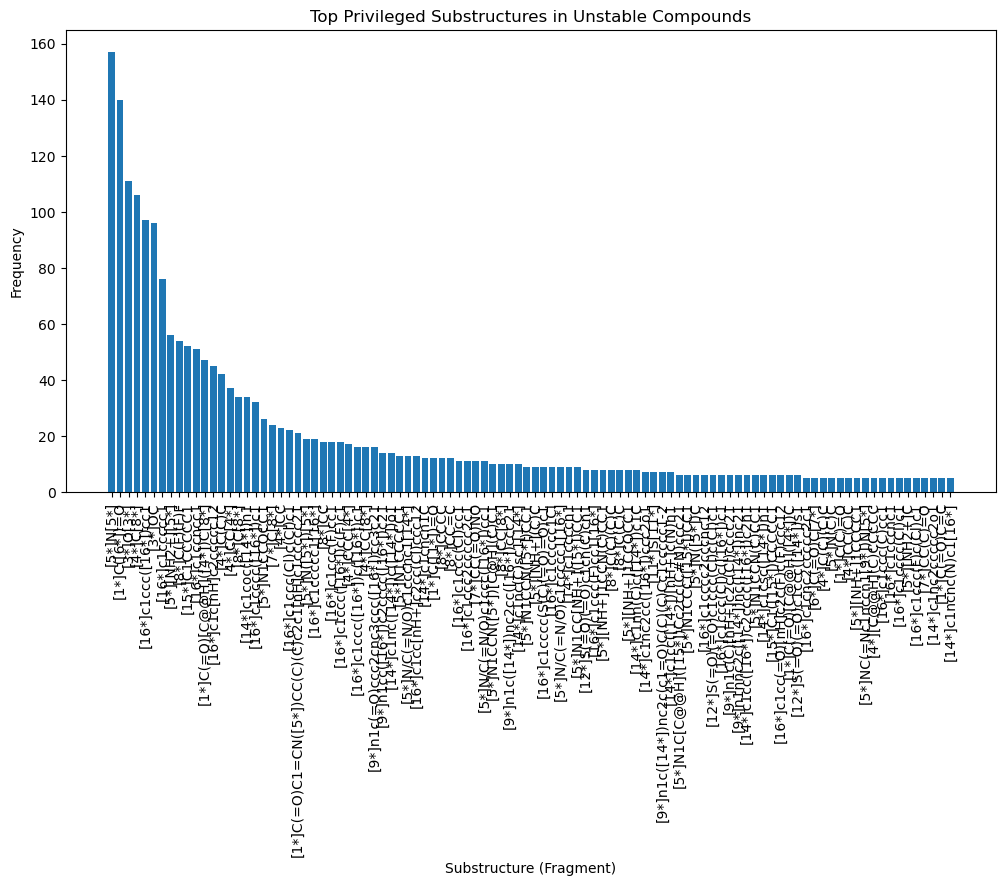

c:\Users\kmml910\AppData\Local\anaconda3\envs\mouse_microsomal_stability\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


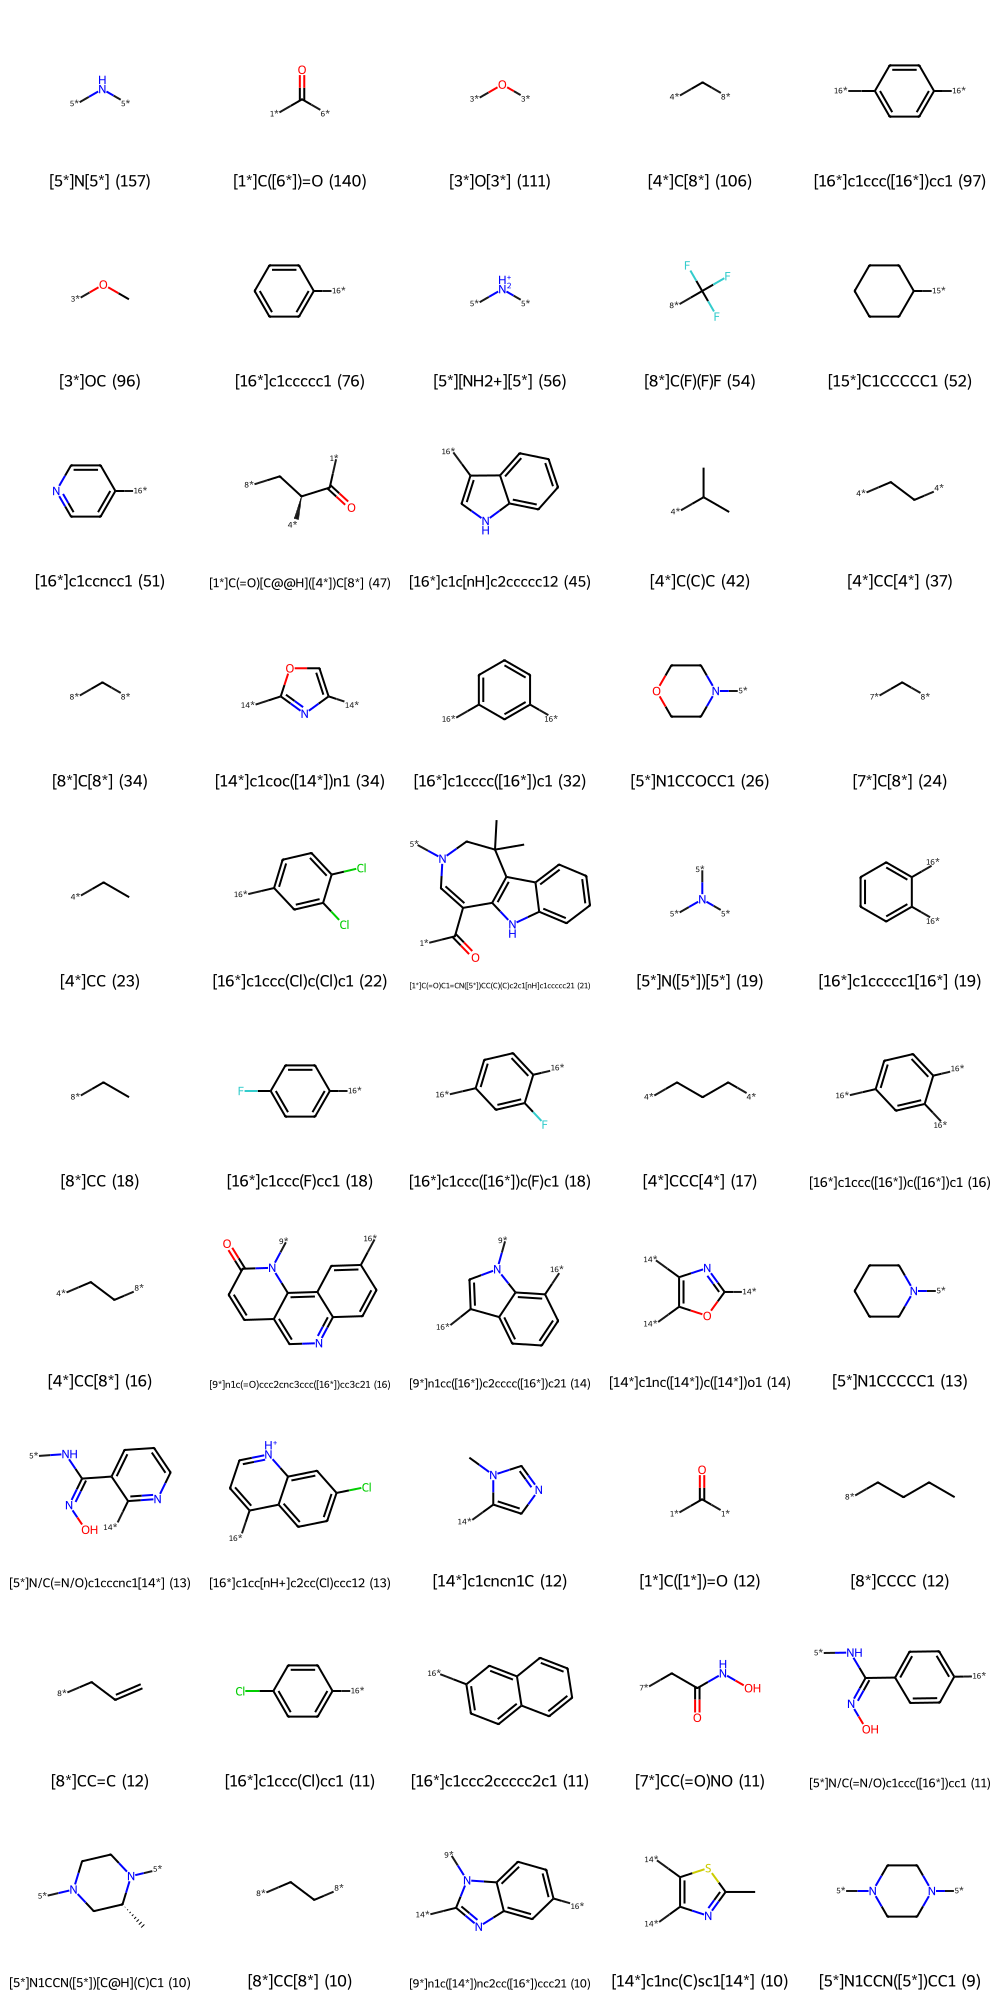

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import BRICS
from rdkit.Chem.Draw import MolsToGridImage
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import display

# Path to your SDF file
sdf_file = "Structures_759_training.sdf"  

# Load the molecules from the SDF file
mols = [mol for mol in Chem.SDMolSupplier(sdf_file) if mol is not None]

# Create a DataFrame with SMILES and the 'Stable' labels
df = pd.DataFrame({
    'SMILES': [Chem.MolToSmiles(mol) for mol in mols],
    'Stable': [int(mol.GetProp('Stable')) for mol in mols]  # Assuming 'Stable' is a property in your SDF
})

# Function to generate fragments using BRICS decomposition
def generate_fragments(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return BRICS.BRICSDecompose(mol)
        else:
            return set()
    except:
        return set()

# Extract BRICS fragments for each SMILES
df['Fragments'] = df['SMILES'].apply(generate_fragments)

# Count fragment frequency in unstable compounds
unstable_fragments = Counter()

for _, row in df.iterrows():
    if row['Stable'] == 0:  # Unstable
        unstable_fragments.update(row['Fragments'])

# Display top N fragments from unstable compounds
top_n = 100
top_unstable = unstable_fragments.most_common(top_n)

# Visualize top fragments with frequency
labels, values = zip(*top_unstable)

plt.figure(figsize=(12, 6))
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel('Substructure (Fragment)')
plt.ylabel('Frequency')
plt.title('Top Privileged Substructures in Unstable Compounds')
plt.show()

# Draw top substructures
substruct_mols = [Chem.MolFromSmiles(frag[0]) for frag in top_unstable if frag[0] != '']
substruct_labels = [f"{frag[0]} ({frag[1]})" for frag in top_unstable]

# Use RDKit to draw and display the grid of molecules
img = MolsToGridImage(substruct_mols, legends=substruct_labels, molsPerRow=5)

# Use IPython to display the image (useful in Jupyter Notebooks)
display(img)